In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
df=pd.read_csv('Housing.csv')
X=df.drop('price',axis=1)
y=df['price']

In [91]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['mainroad']=le.fit_transform(X['mainroad'])
X['guestroom']=le.fit_transform(X['guestroom'])
X['basement']=le.fit_transform(X['basement'])
X['hotwaterheating']=le.fit_transform(X['hotwaterheating'])
X['airconditioning']=le.fit_transform(X['airconditioning'])
X['prefarea']=le.fit_transform(X['prefarea'])
X['furnishingstatus']=le.fit_transform(X['furnishingstatus'])

print(X)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [93]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=10,random_state=0)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [94]:
y_pred=rf.predict(X_test)
y_pred

array([5243000.        , 7195300.        , 3787000.        ,
       4442200.        , 4186000.        , 3126900.        ,
       4757900.        , 6082300.        , 3225600.        ,
       2744000.        , 9940000.        , 3361750.        ,
       3035200.        , 3380300.        , 3493000.        ,
       4542300.        , 3502100.        , 6038550.        ,
       3316600.        , 4714150.        , 4940250.        ,
       5920600.        , 3085833.33333333, 3954300.        ,
       5331900.        , 6950300.        , 4051600.        ,
       4266500.        , 6532400.        , 3202500.        ,
       5943000.        , 3074400.        , 6978300.        ,
       4272800.        , 3105200.        , 5621000.        ,
       4770500.        , 3507000.        , 3017000.        ,
       3979500.        , 4688600.        , 2832200.        ,
       7387800.        , 4273500.        , 4333000.        ,
       4398800.        , 6688500.        , 4068750.        ,
       2837800.        ,

In [95]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.642967468999922

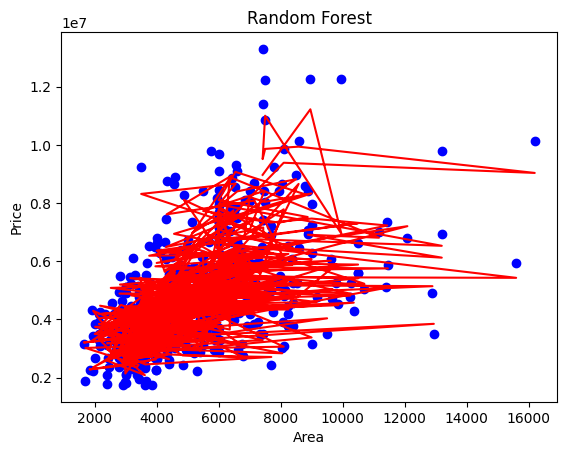

In [96]:
plt.scatter(X['area'],y,color='blue')
plt.plot(X['area'],rf.predict(X),color='red')
plt.title('Random Forest')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()